In [1]:
# Showing images in notebook
%pylab inline
# Automatic differentiation
import tensorflow as tf
# Vector operations
import numpy as np
# Image handling
from PIL import Image

Populating the interactive namespace from numpy and matplotlib


## 1. Load content and style images

### Loading
Load images from disk into vectors

In [2]:
# Declare filepaths of our images on disk.
filenames = ['./images/content.jpg', './images/style.jpg']
filename_queue = tf.train.string_input_producer(filenames, shuffle=False)

# Read images from disk.
reader = tf.WholeFileReader()
key, value = reader.read(filename_queue)

# Convert image to tensor.
image_queue = tf.image.decode_jpeg(value, channels=3)

# Dict for storing our image tensors.
images = {}

with tf.Session():
    # Start populating the filename queue.
    coord = tf.train.Coordinator()
    threads = tf.train.start_queue_runners(coord=coord)
    
    # Perform image decode operation.
    images['content'] = image_queue.eval()
    images['style'] = image_queue.eval()
    
    # Stop queue runners.
    coord.request_stop()
    coord.join(threads)

#### Content image
by Ethan Sykes: https://unsplash.com/?photo=iISyBKOT2D0

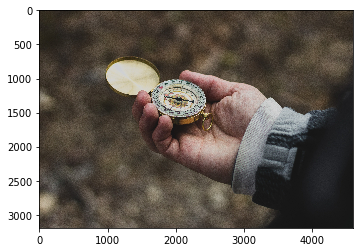

(3192, 4598, 3)


In [3]:
image = images['content']
imshow(Image.fromarray(np.asarray(image)))
show()
print(image.shape)

#### Style image

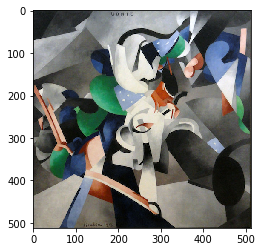

(512, 512, 3)


In [4]:
image = images['style']
imshow(Image.fromarray(np.asarray(image)))
show()
print(image.shape)

### Preprocessing

### 2. load pre-trained VGG

### 3. feedforward content and style to get activations for the right layers

### 4. Define losses

### 5. Backprop gradients of total loss into white noise image (or content image)